In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# feature extraction, creating models that reuse intermediate features from another model.

import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2023-08-18 07:04:34.352346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 07:04:34.430182: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-18 07:04:34.446954: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-18 07:04:34.731693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [3]:
vocabulary_size = 10000
num_tags = 100
num_department = 4

In [4]:
# building input symbolic tensors for 3 inputs using functional API
title = keras.Input(shape=(vocabulary_size), name='title')
text_body = keras.Input(shape=(vocabulary_size), name='text_body')
tags = keras.Input(shape=(num_tags), name='tags')

# concatenationg the layers
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

# creating 2 output layers
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_department, activation='softmax', name='department')(features)
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

2023-08-18 07:04:35.122120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-18 07:04:35.126863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-18 07:04:35.126968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-18 07:04:35.127598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [5]:
# printing model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',          

In [6]:
# getting the layers involved in the model as a list.
model.layers

In [7]:
# checking the input and output of each layers
layers_lst = model.layers

# first layer (Input pass through layer)
print('first layer Input and Output')
layers_lst[0].input
layers_lst[0].output

# second layer (Input pass through layer)
print('Second layer Input and Output')
layers_lst[1].input
layers_lst[1].output

# third layer (Input pass through layer)
print('Third layer Input and Output')
layers_lst[2].input
layers_lst[2].output

# fourth layer
print('Fourth layer Input and Output')
layers_lst[3].input
layers_lst[3].output

# fifth layer
print('Fifth layer Input and Output')
layers_lst[4].input
layers_lst[4].output

# sixth layer
print('Sixth layer Input and Output')
layers_lst[5].input
layers_lst[5].output

# seventh layer
print('Seventh layer Input and Output')
layers_lst[6].input
layers_lst[6].output

first layer Input and Output


<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

Second layer Input and Output


<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>

Third layer Input and Output


<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>

Fourth layer Input and Output


[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

Fifth layer Input and Output


<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

Sixth layer Input and Output


<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'priority')>

Seventh layer Input and Output


<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'department')>

In [8]:
# creating random data to feed into the model
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_department))

In [12]:
# choosing optimizer, loss function and metrics and training the model.
model.compile(optimizer='rmsprop', loss=['mean_squared_error', 'categorical_crossentropy'], metrics=[['mean_absolute_error'], ['accuracy']])
model.fit(x=[title_data, text_body_data, tags_data], y=[priority_data, department_data], epochs=1)
model.evaluate(x=[title_data, text_body_data, tags_data], y=[priority_data, department_data])
model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step - loss: 137.6099 - priority_loss: 0.3317 - department_loss: 137.2782 - priority_mean_absolute_error: 0.4979 - department_accuracy: 0.2672


40/40 [==============================] - 0s 2ms/step - loss: 148.6072 - priority_loss: 0.3317 - department_loss: 148.2754 - priority_mean_absolute_error: 0.4979 - department_accuracy: 0.2688


[148.60716247558594,
 0.3317476809024811,
 148.2754364013672,
 0.49793606996536255,
 0.26875001192092896]

40/40 [==============================] - 0s 2ms/step


[array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[3.1109864e-25, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [6.6266392e-23, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [9.2154120e-25, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [7.1780418e-24, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.7731159e-23, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [6.2317375e-29, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
       dtype=float32)]

In [13]:
# instead of the following the right order, using names
model.compile(optimizer='rmsprop', loss={'priority':'mean_squared_error', 'department':'categorical_crossentropy'}, metrics={'priority':['mean_absolute_error'], 'department':['accuracy']})
model.fit(x={'title':title_data, 'text_body':text_body_data, 'tags':tags_data}, y={'priority':priority_data, 'department':department_data}, epochs=1)
model.evaluate(x={'title':title_data, 'text_body':text_body_data, 'tags':tags_data}, y={'priority':priority_data, 'department':department_data})
model.predict(x={'title':title_data, 'text_body':text_body_data, 'tags':tags_data})

40/40 [==============================] - 0s 3ms/step - loss: 158.9307 - priority_loss: 0.3317 - department_loss: 158.5989 - priority_mean_absolute_error: 0.4979 - department_accuracy: 0.2461


40/40 [==============================] - 0s 2ms/step - loss: 113.1920 - priority_loss: 0.3317 - department_loss: 112.8602 - priority_mean_absolute_error: 0.4979 - department_accuracy: 0.2688


[113.1920166015625,
 0.3317476809024811,
 112.86024475097656,
 0.49793606996536255,
 0.26875001192092896]

40/40 [==============================] - 0s 2ms/step


[array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[3.1074266e-31, 9.9975079e-01, 0.0000000e+00, 2.4923254e-04],
        [5.9356299e-28, 9.9999678e-01, 0.0000000e+00, 3.2251392e-06],
        [5.4337151e-31, 9.9998522e-01, 0.0000000e+00, 1.4738980e-05],
        ...,
        [5.9338763e-30, 9.9999988e-01, 0.0000000e+00, 9.1848520e-08],
        [2.8919407e-30, 1.0000000e+00, 0.0000000e+00, 2.6110261e-08],
        [2.0736274e-34, 1.0000000e+00, 0.0000000e+00, 1.6531986e-08]],
       dtype=float32)]

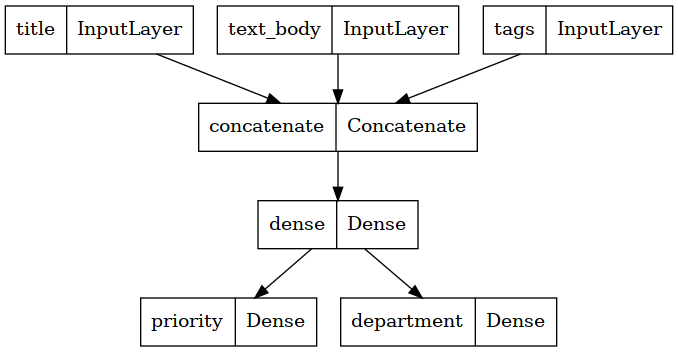

In [14]:
keras.utils.plot_model(model, 'ticket_classifier.png')

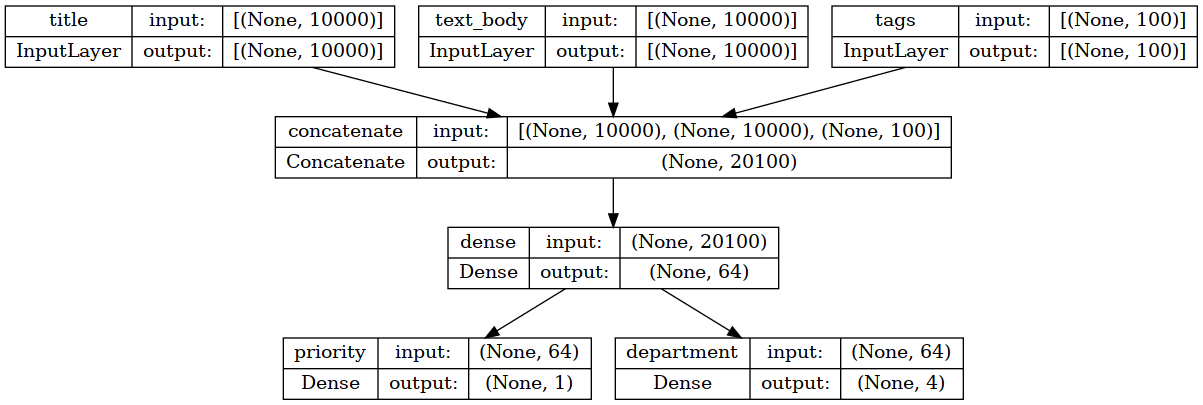

In [15]:
keras.utils.plot_model(model, 'ticket_classifier_with_shape_info.png', show_shapes=True)